In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
import os

from DQN_train import train_dqn
from DDQN_train import train_ddqn

In [2]:
def smooth(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)
    
def run_experiments(env_name, n_episodes, batch_size, hidden_dims, lr, gamma, 
                   eps_start, eps_end, eps_decay_iters, zeta, mem_cap, seeds):
    
    all_dqn_durations = []
    all_ddqn_durations = []
    all_dqn_returns = []
    all_ddqn_returns = []
    
    for seed in seeds:
        dqn_durations, dqn_returns = train_dqn(env_name, n_episodes, batch_size, hidden_dims, lr, gamma, 
                                               eps_start, eps_end, eps_decay_iters, zeta, mem_cap, seed)

        ddqn_durations, ddqn_returns = train_ddqn(env_name, n_episodes, batch_size, hidden_dims, lr, gamma,
                                                  eps_start, eps_end, eps_decay_iters, zeta, mem_cap, seed)
        
        
        all_dqn_durations.append(np.array(dqn_durations))
        all_ddqn_durations.append(np.array(ddqn_durations))
        
        all_dqn_returns.append(np.array(dqn_returns))
        all_ddqn_returns.append(np.array(ddqn_returns))
    
    return all_dqn_durations, all_dqn_returns, all_ddqn_durations, all_ddqn_returns

def plot_run(res_dqn, res_ddqn, env_name='LunarLander', metric='returns', save_dir='./results/', smooth_avg=False):
    res_dqn = np.stack(res_dqn)
    avg_res_dqn = np.mean(res_dqn, axis=0)
    std_res_dqn = np.std(res_dqn, axis=0)
    
    res_ddqn = np.stack(res_ddqn)
    avg_res_ddqn = np.mean(res_ddqn, axis=0)
    std_res_ddqn = np.std(res_ddqn, axis=0)
    
    if smooth_avg:
        avg_res_dqn = smooth(avg_res_dqn, 10)
        avg_res_ddqn = smooth(avg_res_ddqn, 10)
        
    x = np.arange(avg_res_dqn.shape[0])
        
    plt.plot(avg_res_dqn, label='DQN')
    plt.plot(avg_res_ddqn, label='DDQN')
    plt.fill_between(x, avg_res_dqn+std_res_dqn, avg_res_dqn-std_res_dqn, alpha=0.5)
    plt.fill_between(x, avg_res_ddqn+std_res_ddqn, avg_res_ddqn-std_res_ddqn, alpha=0.5)
    plt.title(f'Episode {metric} per episode on {env_name}')
    plt.xlabel('Episode')
    plt.ylabel(f'{metric.capitalize()}')
    plt.legend()
    if not os.path.exists(save_dir):
        os.mkdir(save_dir)
    plt.savefig(os.path.join(save_dir, f'{env_name}_{metric}.png'))
    plt.show()
    plt.close()

def plot_results(results, env_name='CartPole', save_dir='./results/', smooth=False):
    all_dqn_durations, all_dqn_returns, all_ddqn_durations, all_ddqn_returns = results
    
    plot_run(all_dqn_durations, all_ddqn_durations, env_name, metric='durations', 
             save_dir=save_dir, smooth_avg=smooth)    
    plot_run(all_dqn_returns, all_ddqn_returns, env_name, metric='returns', 
             save_dir=save_dir, smooth_avg=smooth)
    
    save_results(results, f'{env_name}_results')
    
def save_results(results, fname, directory='./results/'):
    if not os.path.exists(directory):
        os.mkdir(directory)
    
    with open(os.path.join(directory, f'{fname}.pkl'), 'wb') as handle:
        pkl.dump(results, handle, protocol=pkl.HIGHEST_PROTOCOL)
        
def load_results(fname, directory='./results/'):
    with open(os.path.join(directory, fname), 'rb') as file:
        results = pkl.load(file)
        
    return results

In [3]:
env_name = 'Gridworld-16x16'

n_episodes = 20
batch_size = 128
hidden_dims = [128]
lr = 1e-4
gamma = 0.99
eps_start = 1.0
eps_end = 0.05
eps_decay_iters = 10
# Zeta is not applicable in deterministic environments
zeta = 0.1
mem_cap = 1e3

seeds = [42, 126, 284]

# n_episodes = 500
# batch_size = 128
# hidden_dims = [128]
# lr = 1e-4
# gamma = 0.99
# eps_start = 1.0
# eps_end = 0.05
# eps_decay_iters = 400
# # Zeta is not applicable in deterministic environments
# zeta = 0.1
# mem_cap = 1e3

# seeds = [42, 126, 284]

results_gridworld = run_experiments(env_name, n_episodes, batch_size, hidden_dims, lr, gamma, 
                                   eps_start, eps_end, eps_decay_iters, zeta, mem_cap, seeds)

plot_results(results_gridworld, env_name)

/home/kjw/Documents/UvA/RL/Assignments/Project/Q_network.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  actions = F.softmax(self.l2(F.relu(self.l1(state))))


Episode 0 finished after 1131 steps with return -99.99884280888654
Episode 10 finished after 6 steps with return -5.8519850599
DQN ran for 6.563710927963257 seconds on Gridworld-16x16
Episode 0 finished after 739 steps with return -99.94051481623235
Episode 10 finished after 355 steps with return -97.17840886529692
DDQN ran for 5.130281686782837 seconds on Gridworld-16x16
Episode 0 finished after 759 steps with return -99.95134665551215
Episode 10 finished after 34 steps with return -28.94467727277075
DQN ran for 2.3534440994262695 seconds on Gridworld-16x16
Episode 0 finished after 499 steps with return -99.3363148442005
Episode 10 finished after 16927 steps with return -99.99999999999925
DDQN ran for 128.53629159927368 seconds on Gridworld-16x16
Episode 0 finished after 394 steps with return -98.09336890571012


KeyboardInterrupt: 

In [ ]:
env_name = 'Windy-Gridworld'

n_episodes = 500
batch_size = 128
hidden_dims = [128]
lr = 1e-4
gamma = 0.99
eps_start = 1.0
eps_end = 0.05
eps_decay_iters = 400
# Zeta is not applicable in deterministic environments
zeta = 0.1
mem_cap = 1e3

seeds = [42, 126, 284]

results_windy_gridworld = run_experiments(env_name, n_episodes, batch_size, hidden_dims, lr, gamma, 
                                   eps_start, eps_end, eps_decay_iters, zeta, mem_cap, seeds)

plot_results(results_windy_gridworld, env_name)

In [ ]:
env_name = 'LunarLander-v2'

n_episodes = 700
batch_size = 128
hidden_dims = [128, 128, 128]
lr = 1e-4
gamma = 0.99
eps_start = 1.0
eps_end = 0.1
eps_decay_iters = 500
# Zeta is not applicable in deterministic environments
zeta = 0.1
mem_cap = 1e6

seeds = [42, 126, 284]

results_lunarlander = run_experiments(env_name, n_episodes, batch_size, hidden_dims, lr, gamma, 
                eps_start, eps_end, eps_decay_iters, zeta, mem_cap, seeds)

plot_results(results_lunarlander, env_name, smooth=False)

In [ ]:
env_name = 'LunarLander-v2-stochastic_zetap1'

n_episodes = 700
batch_size = 128
hidden_dims = [128, 128, 128]
lr = 1e-4
gamma = 0.99
eps_start = 1.0
eps_end = 0.1
eps_decay_iters = 500
# Zeta is not applicable in deterministic environments
zeta = 0.1
mem_cap = 1e6

seeds = [42, 126, 284]

results_lunarlander_stoch_zetap1 = run_experiments(env_name, n_episodes, batch_size, hidden_dims, lr, gamma, 
                                   eps_start, eps_end, eps_decay_iters, zeta, mem_cap, seeds)

plot_results(results_lunarlander_stoch_zetap1, env_name)

In [ ]:
env_name = 'LunarLander-v2-stochastic_zetap2'

n_episodes = 700
batch_size = 128
hidden_dims = [128, 128, 128]
lr = 1e-4
gamma = 0.99
eps_start = 1.0
eps_end = 0.1
eps_decay_iters = 500
# Zeta is not applicable in deterministic environments
zeta = 0.1
mem_cap = 1e6

seeds = [42, 126, 284]

results_lunarlander_stoch_zetap2 = run_experiments(env_name, n_episodes, batch_size, hidden_dims, lr, gamma, 
                                   eps_start, eps_end, eps_decay_iters, zeta, mem_cap, seeds)

plot_results(results_lunarlander_stoch_zetap2, env_name)

/home/kjw/Documents/UvA/RL/Assignments/Project/Q_network.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  actions = F.softmax(self.l2(F.relu(self.l1(state))))


Episode 0 finished after 8 steps with return 7.72553055720799
Episode 10 finished after 8 steps with return 7.72553055720799
Episode 20 finished after 11 steps with return 10.466174574128356
Episode 30 finished after 8 steps with return 7.72553055720799
Episode 40 finished after 8 steps with return 7.72553055720799
Episode 50 finished after 9 steps with return 8.64827525163591
Episode 60 finished after 9 steps with return 8.64827525163591
Episode 70 finished after 8 steps with return 7.72553055720799
Episode 80 finished after 9 steps with return 8.64827525163591
Episode 90 finished after 10 steps with return 9.561792499119552
DQN ran for 1.5258111953735352 seconds on CartPole-v1
Episode 0 finished after 9 steps with return 8.64827525163591
Episode 10 finished after 8 steps with return 7.72553055720799
Episode 20 finished after 9 steps with return 8.64827525163591
Episode 30 finished after 8 steps with return 7.72553055720799
Episode 40 finished after 8 steps with return 7.7255305572079

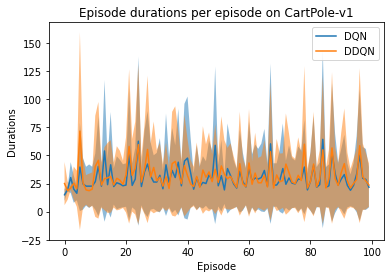

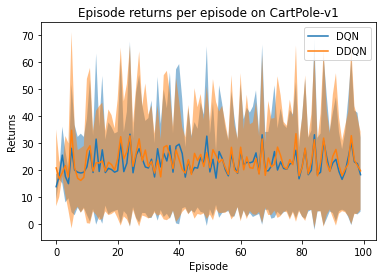

In [4]:
env_name = 'CartPole-v1'

n_episodes = 100
batch_size = 128
hidden_dims = [128]
lr = 1e-4
gamma = 0.99
eps_start = 1.0
eps_end = 0.05
eps_decay_iters = 100
# Zeta is not applicable in deterministic environments
zeta = 0.1
mem_cap = 1e3

seeds = [42, 126, 284]

# n_episodes = 500
# batch_size = 128
# hidden_dims = [128]
# lr = 1e-4
# gamma = 0.99
# eps_start = 1.0
# eps_end = 0.05
# eps_decay_iters = 400
# # Zeta is not applicable in deterministic environments
# zeta = 0.1
# mem_cap = 1e3

# seeds = [42, 126, 284]

results_gridworld = run_experiments(env_name, n_episodes, batch_size, hidden_dims, lr, gamma, 
                                   eps_start, eps_end, eps_decay_iters, zeta, mem_cap, seeds)

plot_results(results_gridworld, env_name)